In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from scipy.stats import ttest_ind
from scipy.stats import shapiro, anderson, kstest, norm

#data = pd.read_csv('data/wnba_train_over_under_data.csv')
df= pd.read_csv('data/wnba_train_regression.csv')
OU = df['OU Result']
df.drop(['OU Result'], axis=1, inplace=True)

class_counts = OU.value_counts()
print(class_counts)
# Calculate under rate
# 59% under rate

# Residuals

# Print point
df["Difference"] = df["Points"] - df["L10 Median"]
df["DARKO Difference"] = df["Points"] - df["DARKO"]
print(df.describe())

print(df[df["Difference"] > 5])


OU Result
0.0    323
1.0    230
Name: count, dtype: int64
       L10 Median      Kalman       DARKO  Relative Performance   Rest Days  \
count  553.000000  553.000000  553.000000            553.000000  553.000000   
mean    15.635624   15.788839   15.745461             -0.907998    2.676311   
std      4.387550    4.359030    4.303622             11.355268    1.089359   
min      7.000000    6.422565    7.269674            -41.200000    1.000000   
25%     12.500000   12.670304   12.529009             -8.111111    2.000000   
50%     15.000000   15.081685   14.971046             -0.157895    2.000000   
75%     19.000000   18.550675   18.237114              7.636364    3.000000   
max     32.000000   29.872336   29.369308             22.157895    8.000000   

         Recent T      Spread      Points        Line  Difference  \
count  553.000000  553.000000  553.000000  553.000000  553.000000   
mean     0.037031    0.148282   15.296564   15.858047   -0.339060   
std      0.751146   12.

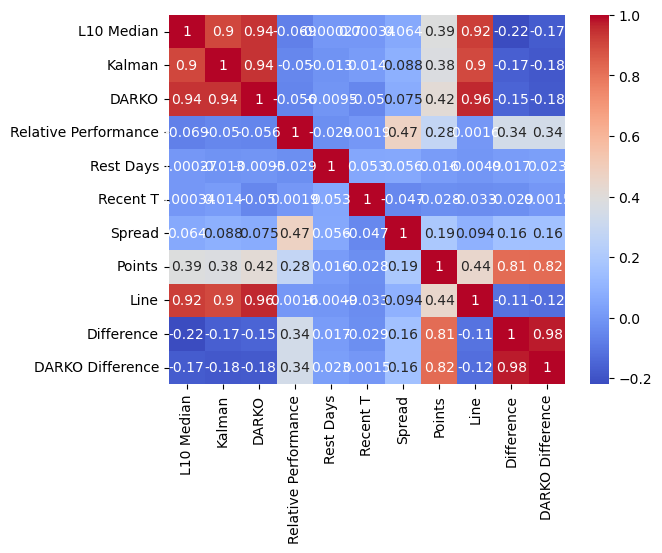

In [2]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [8]:

# Perform independent samples t-test
# Statitical difference between home and away games avarage?

# Is there a significant difference between players that seem to be doing well recently
cutoff = 1.5
points_home_0 = df[df["Recent T"] <= cutoff]["Difference"].values
points_home_1 = df[df["Recent T"] > cutoff]["Difference"].values
print(len(points_home_0), len(points_home_1))
t_stat, p_value = ttest_ind(np.array(points_home_0), np.array(points_home_1))
print(t_stat)
print(p_value)

# Home and Away?
days = 4
points_home_0 = df[df["Rest Days"] <= days]["Difference"].values
points_home_1 = df[df["Rest Days"] > days]["Difference"].values
print(len(points_home_0), len(points_home_1))
t_stat, p_value = ttest_ind(np.array(points_home_0), np.array(points_home_1))
print(t_stat)
print(p_value)

# Kolmogorov-Smirnov Test
data = np.array(df['Points'])
kstest_stat, kstest_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f'Kolmogorov-Smirnov Test: Statistic={kstest_stat}, p-value={kstest_p}')
if kstest_p > 0.05:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# Residuals are NOT normally distributed -- suggests that a Kalman filter purely applied cannot be the best option


"""

# Calculate the correlation between Rest Days and Difference
correlation = df['My PPG'].corr(df['Difference'])
print(f"Correlation between Rest Days and Difference (L10 Median - Points): {correlation}")

# Basic info and statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizations
# Histograms
df.hist(bins=30, figsize=(10, 10))
plt.show()

# Boxplots
df.boxplot(column=['Points', 'Minutes Diff', 'Opponent PPG', 'Rest Days'], figsize=(10, 6))
plt.show()


# Scatter plots


sns.pairplot(df, x_vars=['Points', 'Minutes Diff', 'Rest Days', 'Recent T'], y_vars='OU Result', height=5, aspect=0.8)
plt.show()

# Bar plot for the categorical variable 'Home'
sns.barplot(x='Home', y='OU Result', data=df)
plt.show()
"""

534 19
-0.31572249040384587
0.7523327040505525
520 33
-1.1373862448765768
0.2558712119892813
Kolmogorov-Smirnov Test: Statistic=0.060360730349043545, p-value=0.034101932648311406
Sample does not look Gaussian (reject H0)


'\n\n# Calculate the correlation between Rest Days and Difference\ncorrelation = df[\'My PPG\'].corr(df[\'Difference\'])\nprint(f"Correlation between Rest Days and Difference (L10 Median - Points): {correlation}")\n\n# Basic info and statistics\nprint(df.info())\nprint(df.describe())\n\n# Check for missing values\nprint(df.isnull().sum())\n\n# Visualizations\n# Histograms\ndf.hist(bins=30, figsize=(10, 10))\nplt.show()\n\n# Boxplots\ndf.boxplot(column=[\'Points\', \'Minutes Diff\', \'Opponent PPG\', \'Rest Days\'], figsize=(10, 6))\nplt.show()\n\n\n# Scatter plots\n\n\nsns.pairplot(df, x_vars=[\'Points\', \'Minutes Diff\', \'Rest Days\', \'Recent T\'], y_vars=\'OU Result\', height=5, aspect=0.8)\nplt.show()\n\n# Bar plot for the categorical variable \'Home\'\nsns.barplot(x=\'Home\', y=\'OU Result\', data=df)\nplt.show()\n'

In [5]:
# Estimate median absolute error for all estimators
print(f"Kalman Error: {mean_absolute_error(df['Points'], df['Kalman'])}")
print(f"Line Error: {mean_absolute_error(df['Points'], df['L10 Median'])}")
print(f"L10 Median Error: {mean_absolute_error(df['Points'], df['Line'])}")
print(f"DARKO Error: {mean_absolute_error(df['Points'], df['DARKO'])}") 
#5.46 with median, 0.98
# with median, 0.99
#5.476 with mean, 0.98
#5.41 with mean, 0.98
#5.486 with mean, 0.99

# L10 Median is a LESS BIASED estimator of the median of points than the line itself LMFAO

Kalman Error: 5.556717293189022
Line Error: 5.472875226039783
L10 Median Error: 5.3209764918625675
DARKO Error: 5.406906194736987


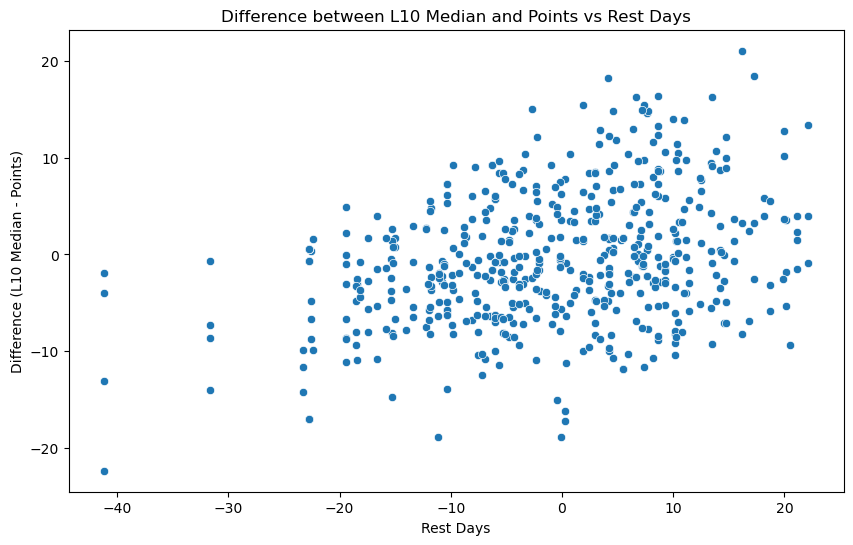

In [6]:

# Plot the difference against Rest Days
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative Performance', y='DARKO Difference')
plt.title('Difference between L10 Median and Points vs Rest Days')
plt.xlabel('Rest Days')
plt.ylabel('Difference (L10 Median - Points)')
plt.show()

# Relative performance vs team performance
# We should really be seeing a PARABOLIC trend -- player performance is maximized if it is a close game (i.e. points = -10 to 10) and minimized otherwise (points = 20 and above)

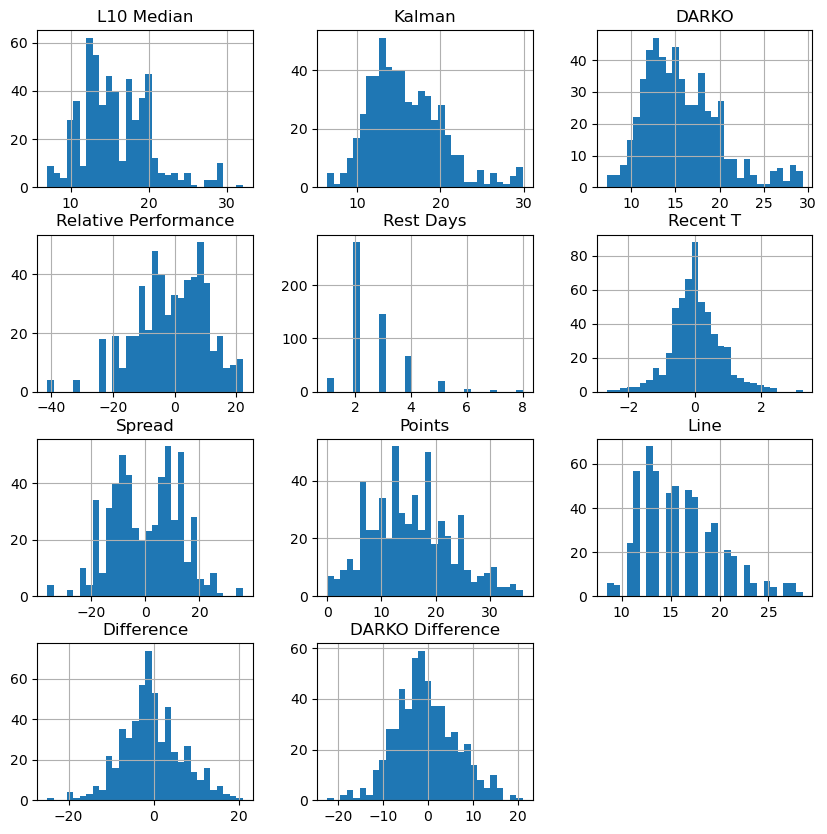

In [7]:
# Histograms
df.hist(bins=30, figsize=(10, 10))
plt.show()